In [6]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import seaborn as sns
%matplotlib inline

In [7]:
covid_df = pd.read_csv('covid_19_data.csv')

In [8]:
covid_df.head(30)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [9]:
covid_df['ObservationDate'] = pd.to_datetime(covid_df['ObservationDate'])

In [10]:
covid_df.drop(['SNo', 'Province/State', 'Country/Region', 'Last Update'], axis=1, inplace=True)

In [11]:
covid_df.head(30)

,ObservationDate,Confirmed,Deaths,Recovered
0,2020-01-22,1.0,0.0,0.0
1,2020-01-22,14.0,0.0,0.0
2,2020-01-22,6.0,0.0,0.0
3,2020-01-22,1.0,0.0,0.0
4,2020-01-22,0.0,0.0,0.0
5,2020-01-22,26.0,0.0,0.0
6,2020-01-22,2.0,0.0,0.0
7,2020-01-22,1.0,0.0,0.0
8,2020-01-22,4.0,0.0,0.0
9,2020-01-22,1.0,0.0,0.0


In [12]:
daily_observation = covid_df.groupby('ObservationDate').sum()
daily_observation

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
2020-01-27,2927.0,82.0,61.0
2020-01-28,5578.0,131.0,107.0
2020-01-29,6165.0,133.0,126.0
2020-01-30,8235.0,171.0,143.0


In [13]:
daily_observation.reset_index(inplace=True)
daily_observation['which_day']=(daily_observation['ObservationDate']-daily_observation['ObservationDate'].min()).dt.days+1
daily_observation

,ObservationDate,Confirmed,Deaths,Recovered,which_day
0,2020-01-22,555.0,17.0,28.0,1
1,2020-01-23,653.0,18.0,30.0,2
2,2020-01-24,941.0,26.0,36.0,3
3,2020-01-25,1438.0,42.0,39.0,4
4,2020-01-26,2118.0,56.0,52.0,5
5,2020-01-27,2927.0,82.0,61.0,6
6,2020-01-28,5578.0,131.0,107.0,7
7,2020-01-29,6165.0,133.0,126.0,8
8,2020-01-30,8235.0,171.0,143.0,9
9,2020-01-31,9925.0,213.0,222.0,10


In [14]:
daily_observation['Infected']=daily_observation['Confirmed']-(daily_observation['Recovered']-daily_observation['Deaths'])
daily_observation

,ObservationDate,Confirmed,Deaths,Recovered,which_day,Infected
0,2020-01-22,555.0,17.0,28.0,1,544.0
1,2020-01-23,653.0,18.0,30.0,2,641.0
2,2020-01-24,941.0,26.0,36.0,3,931.0
3,2020-01-25,1438.0,42.0,39.0,4,1441.0
4,2020-01-26,2118.0,56.0,52.0,5,2122.0
5,2020-01-27,2927.0,82.0,61.0,6,2948.0
6,2020-01-28,5578.0,131.0,107.0,7,5602.0
7,2020-01-29,6165.0,133.0,126.0,8,6172.0
8,2020-01-30,8235.0,171.0,143.0,9,8263.0
9,2020-01-31,9925.0,213.0,222.0,10,9916.0


In [15]:
X = daily_observation[['which_day']]
y = daily_observation[['Infected']]

In [16]:
linreg = LinearRegression()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)


In [18]:
R2 = metrics.r2_score(y_test, y_pred)
print('R^2:', R2)
n = X_test.shape[0] #sample size
p = X_test.shape[1] #number of predictors
print('Adjusted R^2 :' , 1-(1-R2)*(n-1)/(n-p-1))

R^2: 0.6841965844357012
Adjusted R^2 : 0.6599040140076782


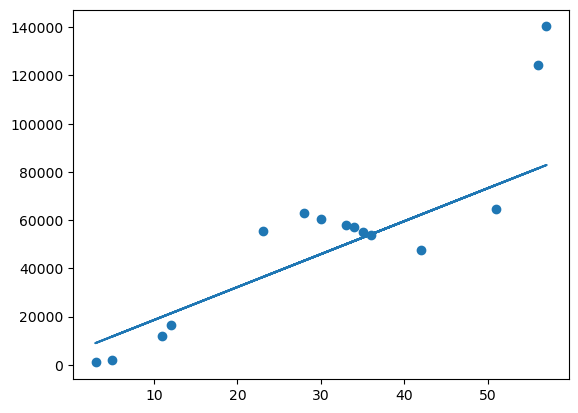

In [19]:
plt.scatter(X_test['which_day'], y_test)
plt.plot(X_test['which_day'], y_pred)
plt.show()